<a href="https://colab.research.google.com/github/Haepe-Bangkit/Haepe-ML-Model/blob/main/Haepe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('cemara_dataset.csv')
data = data.drop(['Timestamp'], axis=1)
data = data.dropna(axis=0)
x = data.drop(['Aktivitas'], axis=1)
y = data['Aktivitas']

le = LabelEncoder()
x = pd.get_dummies(x)
y = le.fit_transform(y)
x.shape, y.shape

((222, 45), (222,))

### Mendefenisikan arsitektur fully connected layer
pendefenisian arsitektur fully connected neural network menggunakan API fungsi sequential() 

In [2]:
def build_fc_model():
  fc_model = tf.keras.Sequential([

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(23, activation=tf.nn.relu, input_shape=(46,)),
      tf.keras.layers.Dense(46, activation=tf.nn.relu),
      tf.keras.layers.Dense(92, activation=tf.nn.relu),
      tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) 
      
  ])
  return fc_model

model = build_fc_model()

###Melakukan compile dengan menggunakan Optimizer Adam dan learning rate=0.001, loss"MSE" dan metrics "MAE"

In [3]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['mae'])


###Training Data

In [6]:
BATCH_SIZE = 32
EPOCHS = 20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
hasilAdam = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE)
model.save('haepe.h5')

Epoch 1/20
5/5 [==============================] - 0s 20ms/step - loss: 8.3291 - mae: 2.1742 - val_loss: 6.9702 - val_mae: 2.1642
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 8.3291 - mae: 2.1742 - val_loss: 6.9702 - val_mae: 2.1642
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 8.3291 - mae: 2.1742 - val_loss: 6.9702 - val_mae: 2.1642
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 8.3291 - mae: 2.1742 - val_loss: 6.9702 - val_mae: 2.1642
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 8.3291 - mae: 2.1742 - val_loss: 6.9702 - val_mae: 2.1642
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 8.3291 - mae: 2.1742 - val_loss: 6.9702 - val_mae: 2.1642
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 8.3291 - mae: 2.1742 - val_loss: 6.9702 - val_mae: 2.1642
Epoch 8/20
5/5 [==============================] - 0s 9ms/step - loss: 8.3291 - mae: 2.1742 - val_los

##Menampilkan hasil

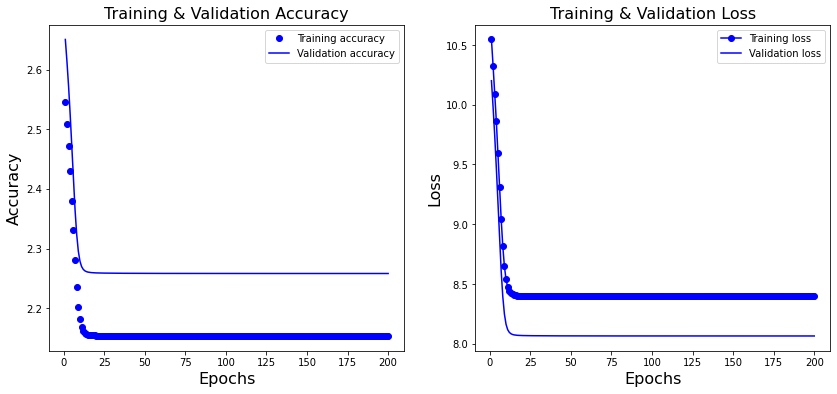

In [5]:
import matplotlib.pyplot as plt
 
history_dict = hasilAdam.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo-', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [ ]:
import pathlib
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_file = pathlib.Path('haepe.tflite')
tflite_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\RIZKIP~1\AppData\Local\Temp\tmpu0x31rhd\assets


51480